In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("dataset.csv")
df = pd.DataFrame(data)
print(df)

                    Nama  Gaji (jutaan)  Pengeluaran (jutaan)
0               John Doe            5.0                   2.0
1             Jane Smith            4.5                   1.5
2        Michael Johnson            6.0                   3.0
3            Emily Davis            7.0                   2.5
4           David Wilson            3.0                   2.0
5         Sarah Anderson            3.5                   1.5
6          Robert Taylor            8.0                   4.0
7         Jennifer Brown            9.0                   3.5
8   Christopher Martinez            2.5                   1.8
9        Amanda Thompson            3.5                   2.2
10          Jason Garcia            4.0                   1.8
11        Jessica Thomas            5.5                   2.8
12        Brian Robinson            6.0                   3.2
13        Stephanie Hill            6.5                   3.8
14           Kevin Lewis            4.0                   2.0
15      

In [56]:
df = df.drop(['Nama'], axis=1)
print(df)

    Gaji (jutaan)  Pengeluaran (jutaan)
0             5.0                   2.0
1             4.5                   1.5
2             6.0                   3.0
3             7.0                   2.5
4             3.0                   2.0
5             3.5                   1.5
6             8.0                   4.0
7             9.0                   3.5
8             2.5                   1.8
9             3.5                   2.2
10            4.0                   1.8
11            5.5                   2.8
12            6.0                   3.2
13            6.5                   3.8
14            4.0                   2.0
15            4.5                   2.3
16            5.0                   2.5
17            3.0                   1.7
18            5.5                   3.0
19            6.0                   3.5
20            7.0                   4.0
21            3.5                   1.5
22            4.0                   1.8
23            4.5                   2.0


In [57]:
X = np.asarray(df)
print("\nData Gaji dan Pengeluaran")    
print(X)    

# Menentukan K-Means randomly
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,  
    max_iter=300,
    random_state=42
)

kmeans.fit(X)
print("\nCentroid Random")
print(kmeans.cluster_centers_)




Data Gaji dan Pengeluaran
[[5.  2. ]
 [4.5 1.5]
 [6.  3. ]
 [7.  2.5]
 [3.  2. ]
 [3.5 1.5]
 [8.  4. ]
 [9.  3.5]
 [2.5 1.8]
 [3.5 2.2]
 [4.  1.8]
 [5.5 2.8]
 [6.  3.2]
 [6.5 3.8]
 [4.  2. ]
 [4.5 2.3]
 [5.  2.5]
 [3.  1.7]
 [5.5 3. ]
 [6.  3.5]
 [7.  4. ]
 [3.5 1.5]
 [4.  1.8]
 [4.5 2. ]
 [5.  2.2]
 [5.5 2.8]
 [6.  3. ]
 [6.5 3.5]
 [3.5 1.5]
 [4.  1.8]
 [4.5 2. ]
 [5.  2.2]
 [5.5 2.8]
 [6.  3. ]
 [6.5 3.5]
 [7.  4. ]
 [3.5 1.5]
 [4.  1.8]
 [4.5 2. ]
 [5.  2.2]
 [5.5 2.8]
 [6.  3. ]
 [6.5 3.5]
 [3.5 1.5]
 [4.  1.8]
 [4.5 2. ]
 [5.  2.2]
 [5.5 2.8]
 [6.  3. ]]

Centroid Random
[[7.11111111 3.58888889]
 [3.83333333 1.80952381]
 [5.52631579 2.73684211]]


In [58]:
# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_

# Menambahkan label cluster ke dalam DataFrame
df['Cluster'] = labels

# Menampilkan data dalam setiap cluster
for cluster in np.unique(labels):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nData dalam Cluster {cluster}:")
    print(cluster_data)



Data dalam Cluster 0:
    Gaji (jutaan)  Pengeluaran (jutaan)  Cluster
3             7.0                   2.5        0
6             8.0                   4.0        0
7             9.0                   3.5        0
13            6.5                   3.8        0
20            7.0                   4.0        0
27            6.5                   3.5        0
34            6.5                   3.5        0
35            7.0                   4.0        0
42            6.5                   3.5        0

Data dalam Cluster 1:
    Gaji (jutaan)  Pengeluaran (jutaan)  Cluster
1             4.5                   1.5        1
4             3.0                   2.0        1
5             3.5                   1.5        1
8             2.5                   1.8        1
9             3.5                   2.2        1
10            4.0                   1.8        1
14            4.0                   2.0        1
15            4.5                   2.3        1
17            3.0      

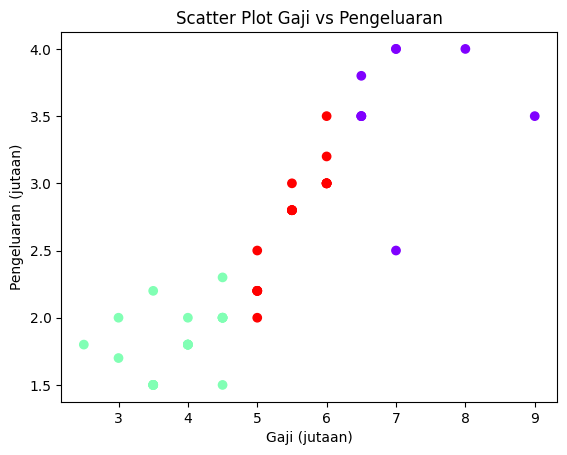

In [59]:
# Hasil Clustering Data
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("Gaji (jutaan)")
plt.ylabel("Pengeluaran (jutaan)")
plt.title("Scatter Plot Gaji vs Pengeluaran")
plt.show()

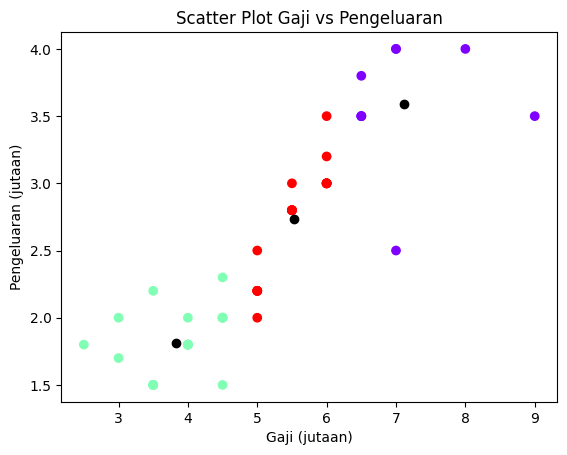

In [60]:
# memviusalisasikan hasil clustering ddengan controid
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.xlabel("Gaji (jutaan)")
plt.ylabel("Pengeluaran (jutaan)")
plt.title("Scatter Plot Gaji vs Pengeluaran")
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)

# Menghitung WCSS (Within-Cluster Sum of Squares)
wcss = kmeans.inertia_
print("WCSS:", wcss)

# Menghitung Silhouette Coefficient
silhouette_coefficient = silhouette_score(X, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_coefficient)

WCSS: 21.74359231411863
Silhouette Coefficient: 0.5159780601556684
